<a href="https://colab.research.google.com/github/Shivani-781/Ganga-Water-Quality-Assessment/blob/main/9_Data_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering using K-Means

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

Reading dataset

In [ ]:
df = pd.read_csv('Ganga_data.csv')
df.head()

,Date,Frame No,BAT,COND,DO,ORP,PH,WT
0,12-01-2019 12:57,0,91.0,0.044698,14.832754,0.084822,8.879727,22.650238
1,12-01-2019 12:58,1,92.0,0.044651,14.170345,0.086292,8.866815,22.567017
2,12-01-2019 14:54,0,90.0,46.195190,13.501176,0.142900,12.359906,18.400787
3,12-01-2019 14:55,1,91.0,52.609680,20.752865,0.146236,12.825684,18.013641
4,12-01-2019 14:56,2,91.0,52.399826,12.409351,0.146724,12.998978,18.184570


In [ ]:
X = df[['BAT', 'COND', 'DO', 'ORP', 'PH', 'WT']]
X

,BAT,COND,DO,ORP,PH,WT
0,91.0,0.044698,14.832754,0.084822,8.879727,22.650238
1,92.0,0.044651,14.170345,0.086292,8.866815,22.567017
2,90.0,46.195190,13.501176,0.142900,12.359906,18.400787
3,91.0,52.609680,20.752865,0.146236,12.825684,18.013641
4,91.0,52.399826,12.409351,0.146724,12.998978,18.184570
...,...,...,...,...,...,...
46978,87.0,721.867250,10.008608,0.116298,9.377568,27.130707
46979,85.0,722.117000,10.008608,0.116288,9.374988,27.142334
46980,80.0,722.028700,10.008608,0.116238,9.375849,27.139954
46981,81.0,721.960700,10.008608,0.116218,9.380211,27.135010


Finding k using elow method

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[1691059057.0376759,
 522205688.05087614,
 219578991.31481624,
 116056892.35494024,
 74120846.50755595,
 45568649.49158244,
 32652968.73655019,
 23902054.755130023,
 19171316.199097097,
 15243209.50190185]

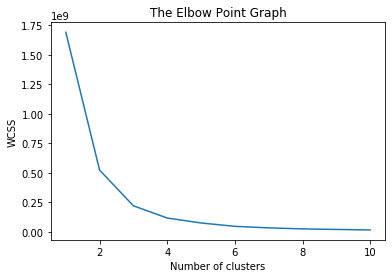

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

So, k = 4.

In [ ]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)

#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)

[1 1 1 ... 0 0 0]


In [ ]:
df['Cluster'] = y

In [ ]:
df.head()

,Date,Frame No,BAT,COND,DO,ORP,PH,WT,Cluster
0,12-01-2019 12:57,0,91.0,0.044698,14.832754,0.084822,8.879727,22.650238,1
1,12-01-2019 12:58,1,92.0,0.044651,14.170345,0.086292,8.866815,22.567017,1
2,12-01-2019 14:54,0,90.0,46.195190,13.501176,0.142900,12.359906,18.400787,1
3,12-01-2019 14:55,1,91.0,52.609680,20.752865,0.146236,12.825684,18.013641,1
4,12-01-2019 14:56,2,91.0,52.399826,12.409351,0.146724,12.998978,18.184570,1


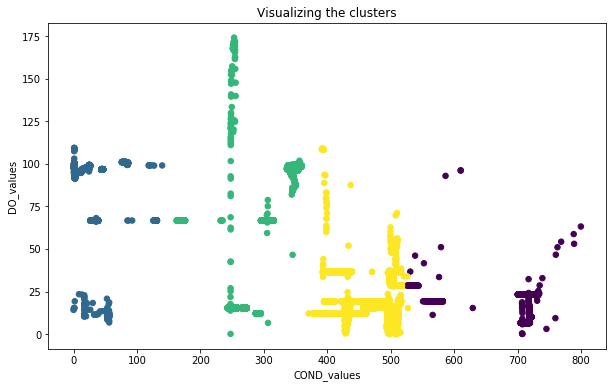

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(df['COND'], df['DO'], c = y, s = 30)
plt.xlabel('COND_values')
plt.ylabel('DO_values')
plt.title('Visualizing the clusters')
plt.show()

In [ ]:
df.to_csv('Ganga_Classification_data.csv', index = False)